# TRESHOLDING

The treshold system is a nonlinear, but time-invariant operation on signals. In signal analysis applications, thresholding is used to separate the signal domain into regions according to the value that the signal assumes. Thresholding systems are a principal tool for signal segmentation. Thresholding can be applied globally or locally.

### Treshold system is nonlinear means : Any changes in input may result in a completely different output!

#### Example of Nonlinearity in a Treshold System:
Imagine a system where an input signal  𝑥(𝑡) is processed through a threshold function , where 𝑇 is the threshold value : 

$$
y(t) = \begin{cases} 
1, & \text{if } x(t) \geq T \\
0, & \text{if } x(t) < T 
\end{cases}
$$
We consider two input signals:
$$
x_1(t) = \sin(t)
$$

$$
x_2(t) = 2\sin(t)
$$

The second signal has twice the amplitude of the first, affecting how it interacts with a threshold function.


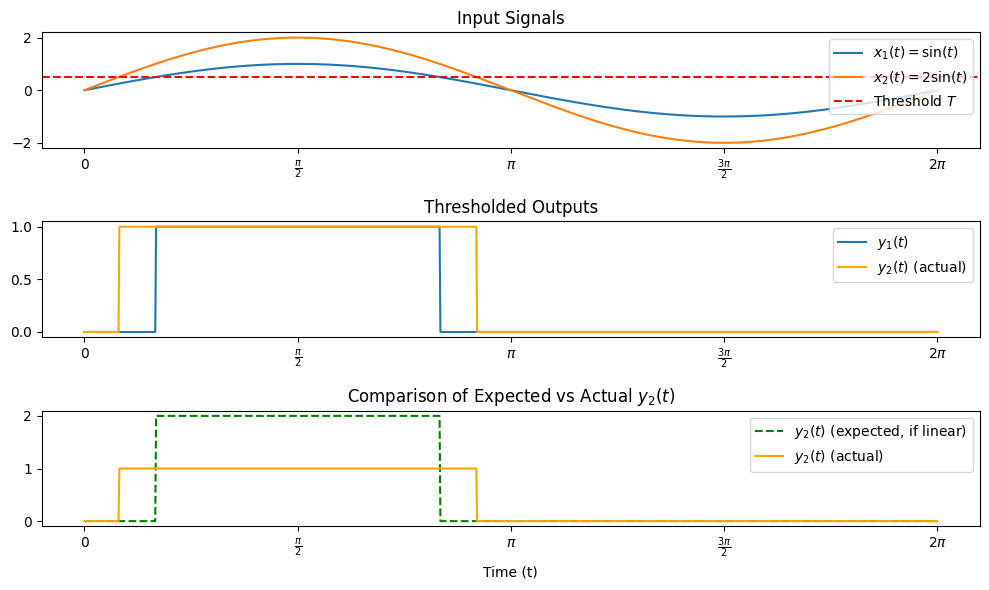

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define time range
t = np.linspace(0, 2*np.pi, 1000)

# Define signals
x1 = np.sin(t)
x2 = 2 * np.sin(t)

# Define threshold function
T = 0.5
y1 = np.where(x1 >= T, 1, 0)
y2_actual = np.where(x2 >= T, 1, 0)

# Expected threshold response for a linear system
y2_expected = 2 * y1  # Linear scaling assumption

# Define tick positions and labels
tick_positions = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
tick_labels = ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']

# Plot signals and thresholded outputs
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, x1, label=r'$x_1(t) = \sin(t)$', linestyle='solid')
plt.plot(t, x2, label=r'$x_2(t) = 2\sin(t)$', linestyle='solid')
plt.axhline(y=T, color='red', linestyle='--', label=r'Threshold $T$')
plt.xticks(tick_positions, tick_labels)  # Set x-axis labels in terms of π
plt.legend()
plt.title("Input Signals")

plt.subplot(3, 1, 2)
plt.plot(t, y1, label=r'$y_1(t)$', linestyle='solid')
plt.plot(t, y2_actual, label=r'$y_2(t)$ (actual)', linestyle='solid', color='orange')
plt.xticks(tick_positions, tick_labels)
plt.legend()
plt.title("Thresholded Outputs")

plt.subplot(3, 1, 3)
plt.plot(t, y2_expected, label=r'$y_2(t)$ (expected, if linear)', linestyle='dashed', color='green')
plt.plot(t, y2_actual, label=r'$y_2(t)$ (actual)', linestyle='solid', color='orange')
plt.xticks(tick_positions, tick_labels)
plt.legend()
plt.title("Comparison of Expected vs Actual $y_2(t)$")

plt.xlabel("Time (t)")
plt.tight_layout()
plt.show()


### Treshold is time Invariant : the behavior Does not change overtime

#### To show that thresholding is a time-invariant system, we need to test if shifting the input before applying the threshold gives the same result as shifting the output after applying the threshold.

#### 1. Original Input
We define the input signal:

$$
x(t) = \sin(t)
$$

#### 2. Time-Shifted Input
A shifted version of the input signal:

$$
x(t - t_0)
$$

where \( t_0 \) is a shift amount.

#### 3. Threshold Function
The system applies a threshold function:

$$
y(t) = \begin{cases} 
1, & \text{if } x(t) \geq T \\
0, & \text{if } x(t) < T 
\end{cases}
$$

#### 4. Compare Two Cases
- **Case 1:** Apply threshold first, then shift \( y(t) \) → \( y(t - t0) \).
- **Case 2:** Shift input first, then apply threshold \( x(t - t0) \).

If both cases result in the same output, **thresholding is time-invariant**.


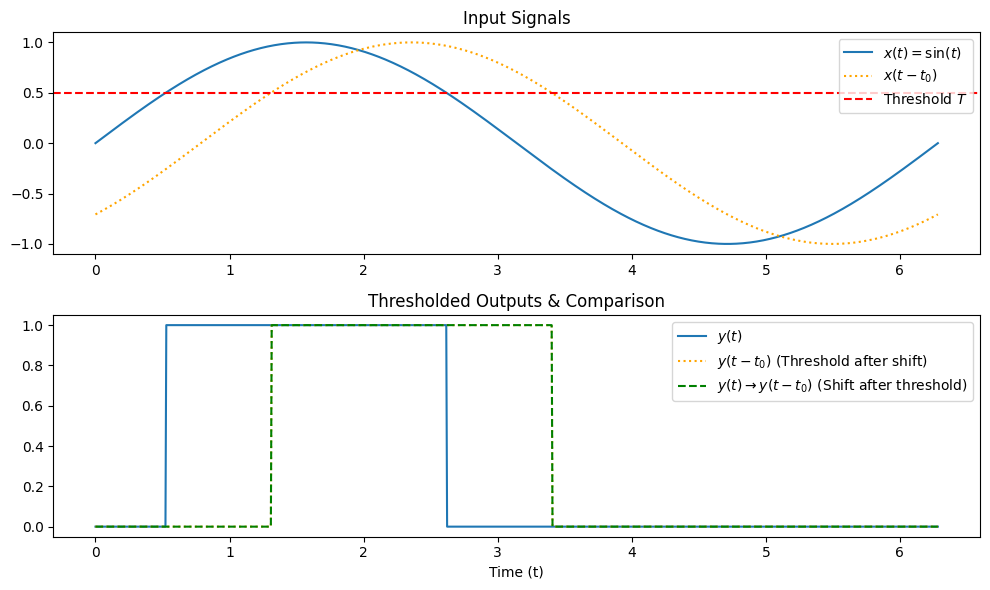

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define time range
t = np.linspace(0, 2*np.pi, 1000)
t_shift = np.pi / 4  # Shift by π/4

# Define input signal
x = np.sin(t)
x_shifted = np.sin(t - t_shift)  # Time-shifted input

# Define threshold function
T = 0.5
y = np.where(x >= T, 1, 0)  # Threshold applied first
y_shifted = np.where(x_shifted >= T, 1, 0)  # Threshold after shift
y_delayed = np.roll(y, int(t_shift / (2*np.pi) * len(t)))  # Shift output after thresholding

# Plot Results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x, label=r'$x(t) = \sin(t)$')
plt.plot(t, x_shifted, label=r'$x(t - t_0)$', linestyle='dotted', color='orange')
plt.axhline(y=T, color='red', linestyle='--', label=r'Threshold $T$')
plt.legend()
plt.title("Input Signals")

plt.subplot(2, 1, 2)
plt.plot(t, y, label=r'$y(t)$', linestyle='solid')
plt.plot(t, y_shifted, label=r'$y(t - t_0)$ (Threshold after shift)', linestyle='dotted', color='orange')
plt.plot(t, y_delayed, label=r'$y(t) \rightarrow y(t - t_0)$ (Shift after threshold)', linestyle='dashed', color='green')
plt.legend()
plt.title("Thresholded Outputs & Comparison")

plt.xlabel("Time (t)")
plt.tight_layout()
plt.show()


# Global Thresholding


#### For purposes of segmentation, one of the easiest techniques is to select a single threshold value and apply it to the entire signal = GLOBAL TRESHOLDING 
For example,for discrete signals, f(n), if we have T as treshold then :

The meaningful component (M) is defined as:
$$ M = \{ n : |f(n)| \geq T \} $$
And (N) is the noise component of f(n):
$$ N = \{ n : |f(n)| \lt T \} $$

More precisely, the thresholding operation just picks out that part of the signal that contains something more—something relevant to the analysis application—than just the background noise.



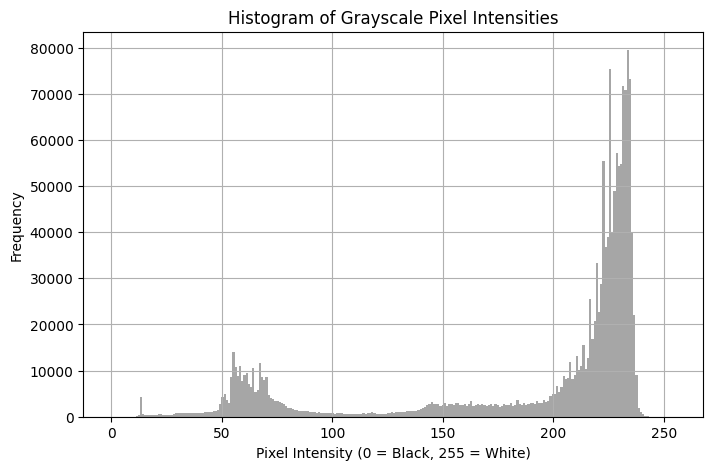

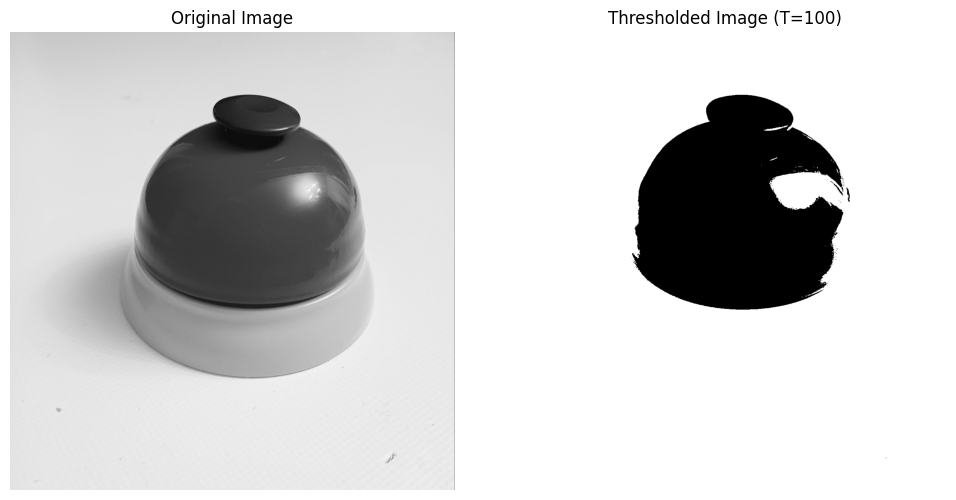

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# Load the image in grayscale.
# you can change the image if you want,
image_path = "sample1.jpg"  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert grayscale pixel values into a Pandas DataFrame
pixel_data = pd.DataFrame(image.flatten(), columns=["Pixel Intensity"])

# Display histogram of pixel intensities
plt.figure(figsize=(8, 5))
plt.hist(pixel_data["Pixel Intensity"], bins=256, range=(0, 255), color="gray", alpha=0.7)
plt.title("Histogram of Grayscale Pixel Intensities")
plt.xlabel("Pixel Intensity (0 = Black, 255 = White)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 🔹 Ask the user for threshold value after showing the histogram
T = int(input("Enter a threshold value (between 0 and 255): "))

# Apply user-defined threshold
_, thresholded_image = cv2.threshold(image, T, 255, cv2.THRESH_BINARY) #Pixels ≥ T become white, others black.

#_, thresholded_image = cv2.threshold(image, T, 255, cv2.THRESH_BINARY_INV) #Pixels ≥ T become black, others white.


# Display the original and thresholded images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap="gray")
plt.title(f"Thresholded Image (T={T})")
plt.axis("off")

plt.tight_layout()
plt.show()


# Optimal Thresholding

In fact, there are several optimal methods for fnding thresholds from signal histograms. Each such “optimal” method discovers the best threshold based on some particular assumption about the histogram’s statistics. 

This is a natural thought, since the histogram approximates the probability density function of the signal values. Accordingly, let us consider some techniques for optimal threshold selection.

## Parametric Approaches
### Suppose that we know the some of the statistical behavior of signals that arrive as inputs to an analysis application.

Suppose that we know the probabilities that a discrete signal value is highmagnitude (meaningful), PH, or low-magnitude (background, noise), PL. These are called the a priori probabilities of meaningful and noise components, respectively.

For example, in a digital telephony system, DTMF pulses might occur at 10 Hz with
an average pulse width of 48 ms. Hence we assume a priori probabilities of PH = 0.48
and PL = 0.52

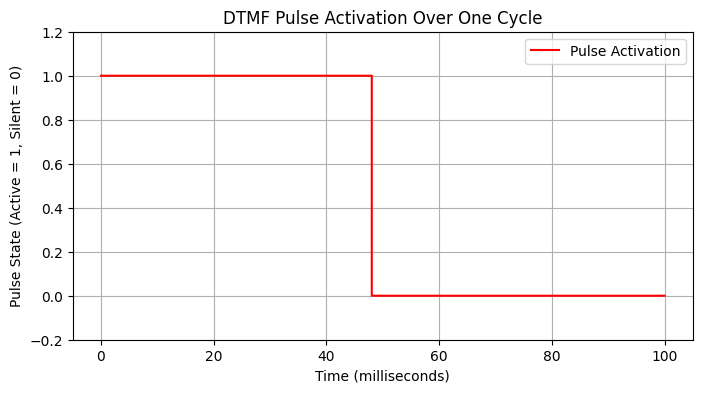

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define cycle parameters
cycle_time_ms = 100  # One full cycle duration (10 Hz)
pulse_width_ms = 48  # Pulse active time
time_ms = np.linspace(0, cycle_time_ms, 1000)  # 1000 points within one cycle

# Generate binary signal activation (1 for active pulse, 0 for silence)
pulse_cycle = np.where(time_ms < pulse_width_ms, 1, 0)

# Plot one cycle of pulse activation
plt.figure(figsize=(8, 4))
plt.plot(time_ms, pulse_cycle, drawstyle='steps-post', color="red", label="Pulse Activation")
plt.title("DTMF Pulse Activation Over One Cycle")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Pulse State (Active = 1, Silent = 0)")
plt.ylim(-0.2, 1.2)  # Adjust y-axis for clarity
plt.grid(True)
plt.legend()
plt.show()


## **Segmentation Errors in Thresholding**

Segmentation errors occur when a noise value is labeled as meaningful, or a meaningful value is labeled as noise. If we define a threshold \( T \) for a signal histogram, the probability of error is given by:

$$
E(T) = P_{H}E_{L}(T) + P_{L}E_{H}(T)
$$

where:
- $ E_{L}(T) $ : is the incorrectly labeling a signal value as noise.
- $ E_{H}(T) $ is the incorrectly labeling a noise value as meaningful.

To Fnd the minimum labeling error, we differentiate $ E(T) = P_{H}E_{L}(T) + P_{L}E_{H}(T) $ and solve the equation $ \frac{dE}{dT} $  = 0.

#### Example(1) : Randome Signals

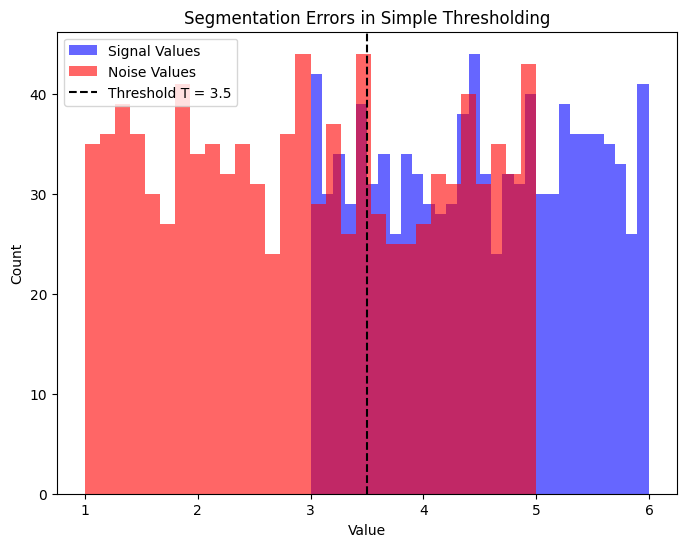

PH*EL(T) = 0.1392 (Signal misclassified as noise)
PL*EH(T) = 0.0712 (Noise misclassified as signal)
E(T) = 0.2104 (Total segmentation error)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate simple uniform distributions
signal = np.random.uniform(low=3, high=6, size=1000)  # Signal: Values between 4 and 6
noise = np.random.uniform(low=1, high=5, size=1000)   # Noise: Values between 1 and 3

# Set threshold
T = 3.5  # Threshold value for classification

# Compute segmentation errors
PH = 0.8
EL = np.mean(signal < T)  # Probability of misclassifying signal as noise
PL = 1 - PH
EH = np.mean(noise > T)   # Probability of misclassifying noise as signal
E_T = PH*EL + PL*EH           # Total segmentation error probability

# Create visualization
plt.figure(figsize=(8, 6))
plt.hist(signal, bins=30, alpha=0.6, color='blue', label="Signal Values")
plt.hist(noise, bins=30, alpha=0.6, color='red', label="Noise Values")
plt.axvline(T, color="black", linestyle="--", label=f"Threshold T = {T}")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Segmentation Errors in Simple Thresholding")
plt.show()

# Print segmentation error probabilities
print(f"PH*EL(T) = {PH*EL:.4f} (Signal misclassified as noise)")
print(f"PL*EH(T) = {PL*EH:.4f} (Noise misclassified as signal)")
print(f"E(T) = {E_T:.4f} (Total segmentation error)")


To Fnd the minimum labeling error, we differentiate $ E(T) = P_{H}E_{L}(T) + P_{L}E_{H}(T) $ and solve the equation:
$$ \frac{d(E(T))}{dT} = 0 $$

$$
 E(T) = P_{H} E_{L}(T) + P_{L} E_{H}(T)
$$
Taking the derivative with respect to \( T \):
$$
 \frac{dE}{dT} = P_{H} \frac{dE_{L}}{dT} + P_{L} \frac{dE_{H}}{dT} = 0
$$

Now, this scheme does not work at all unless we can find estimates for $ E_{L}(T) $ and $ E_{H}(T) $

### Central Limit Theorem (CLT) : قضیه حد مرکزی 

- The Central Limit Theorem (CLT) states that if you take a large number of independent random variables and calculate their average, the distribution of these averages approaches a Gaussian (normal) distribution, regardless of the original distribution shape.

- This means that, even if the original data isn't strictly Gaussian, a large number of samples will generally follow a normal distribution.

- Real-world signal values often show a tendency toward normal-like behavior because they result from numerous interacting factors

- Since both signal values and noise values can have complex distributions, assuming they are Gaussian makes segmentation and error calculations more tractable.

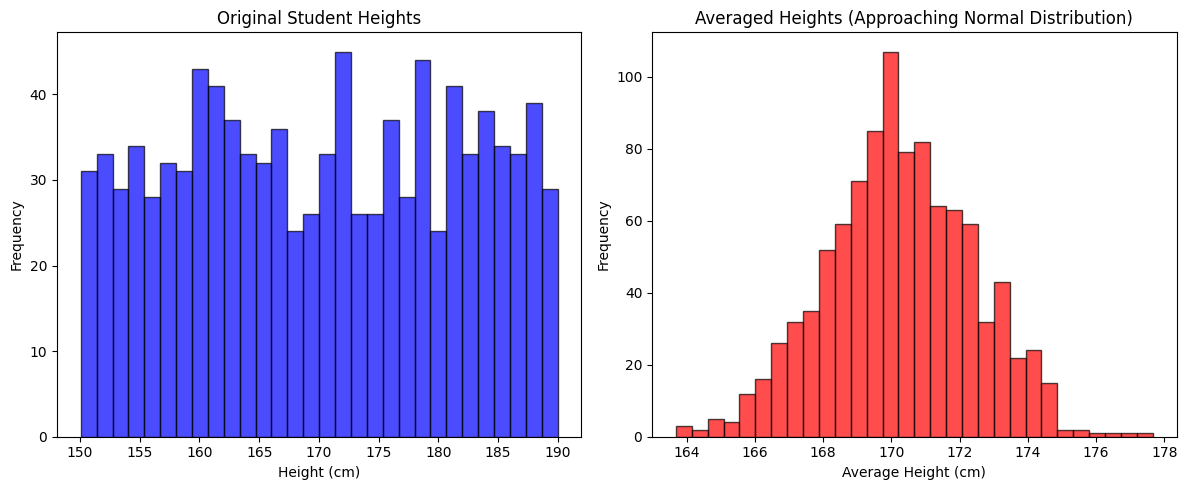

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate random heights for 1000 students
students = np.random.uniform(low=150, high=190, size=1000)  # Heights between 150-190 cm

# Step 2: Group students into sets of 30 and calculate their average height
group_size = 30
num_groups = 1000  # Create 1000 groups
averaged_heights = [np.mean(np.random.choice(students, group_size, replace=False)) for _ in range(num_groups)]

# Step 3: Plot histograms
plt.figure(figsize=(12, 5))

# Histogram of original student heights
plt.subplot(1, 2, 1)
plt.hist(students, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Original Student Heights")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")

# Histogram of averaged heights per group (Central Limit Theorem effect)
plt.subplot(1, 2, 2)
plt.hist(averaged_heights, bins=30, alpha=0.7, color='red', edgecolor='black')
plt.title("Averaged Heights (Approaching Normal Distribution)")
plt.xlabel("Average Height (cm)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Gaussian density function : 

#### Gaussian Distribution Equation
The probability density function (PDF) of a Gaussian distribution is: 

$$  \displaystyle f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$


$$ \large e^{-\frac{(x - \mu)^2}{2\sigma^2}} =  e^{-\frac{1}{2} \left(\frac{x - \mu}{\sigma} \right)^2} $$


$$ \displaystyle f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x - \mu}{\sigma} \right)^2} $$

Where: 
- 𝜇 (mu) is the mean میانگین 
- 𝜎 (sigma) is the standard deviation. انحراف از معیار

% Mean formula
$$ \mu = \frac{1}{N} \sum_{i=1}^{N} x_i $$

% Standard deviation formula
$$ \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2} $$

% Sample standard deviation formula (for small datasets)
$$ \sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \mu)^2} $$


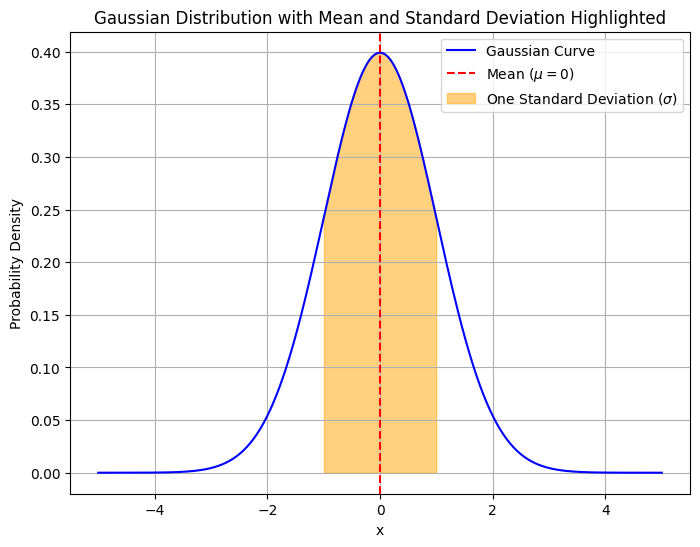

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define Gaussian function
def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Set parameters
mu = 0      # Mean
sigma = 1   # Standard deviation
x = np.linspace(-5, 5, 1000)  # X-axis values

# Compute Gaussian values
y = gaussian(x, mu, sigma)

# Create plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Gaussian Curve", color='blue')

# Highlight mean
plt.axvline(mu, color='red', linestyle="--", label=rf"Mean ($\mu={mu}$)")

# Highlight standard deviation
plt.fill_between(x, y, where=(x > mu - sigma) & (x < mu + sigma), 
                 color='orange', alpha=0.5, label=rf"One Standard Deviation ($\sigma$)")

plt.title("Gaussian Distribution with Mean and Standard Deviation Highlighted")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()


### **Proof: Integral of the Gaussian Function Equals 1** AKA Gaussian function properly defines a probability density function.



#### **Step 1: Compute the Integral**

We want to show that:

$$
I = \int_{-\infty}^{\infty} e^{-x^2} \, dx
$$

Squaring both sides:

$$
I^2 = \left(\int_{-\infty}^{\infty} e^{-x^2} \, dx \right) \times \left(\int_{-\infty}^{\infty} e^{-y^2} \, dy \right)
$$

Switching to polar coordinates:

$$
x^2 + y^2 = r^2, \quad dx \, dy = r \, dr \, d\theta
$$

Rewriting the double integral:

$$
I^2 = \int_0^{2\pi} d\theta \int_0^\infty e^{-r^2} r \, dr
$$

Using the substitution \( u = r^2 \), \( du = 2r \, dr \), we get:

$$
\int_0^\infty e^{-r^2} r \, dr = \frac{1}{2} \int_0^\infty e^{-u} \, du = \frac{1}{2}
$$

Since the angular integral evaluates to \( 2\pi \), we obtain:

$$
I^2 = 2\pi \times \frac{1}{2} = \pi
$$

Thus:

$$
I = \sqrt{\pi}
$$

#### **Step 2: Scaling for Probability Density**

For the **normal distribution function**:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

Scaling the integral:

$$
\int_{-\infty}^{\infty} \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} \, dx = 1
$$

Thus, the Gaussian function properly defines a **probability density function**.



## Let us assume, therefore, Gaussian distributions of both noise and meaningful signal.

#### probability density function for the signal valid values:
$$
q_H(x) = \frac{1}{\sigma_H \sqrt{2\pi}} \cdot e^{-\frac{1}{2} \left( \frac{x - \mu_H}{\sigma_H} \right)^2}
$$

#### probability density function for the signal noise values:
$$
q_{L}(x) = \frac{1}{\sigma_{L} \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x - \mu_{L}}{\sigma_{L}} \right)^2} 
$$ 

Since noise values are on average less than meaningful signal values,
we know that $\large µ_{L} < µ_{H}$

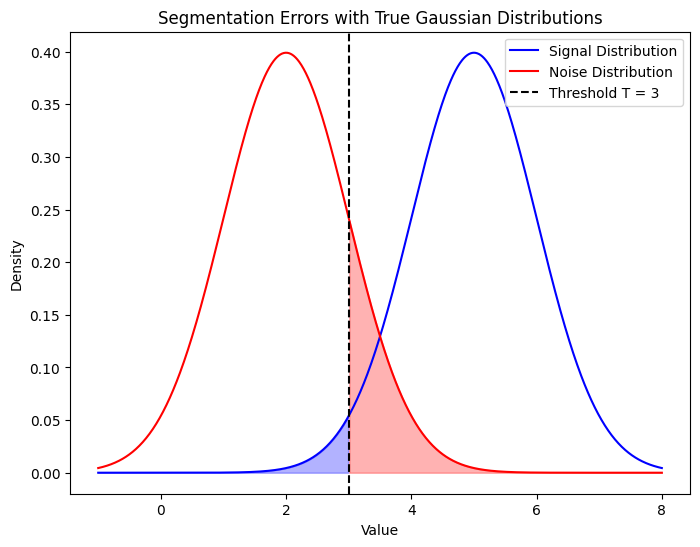

PH*EL(T) = 0.0182 (Signal misclassified as noise)
PL*EH(T) = 0.0317 (Noise misclassified as signal)
E(T) = 0.0499 (Total segmentation error)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define Gaussian distributions
mu_signal, sigma_signal = 5, 1  # Signal: Mean 5, Std 1
mu_noise, sigma_noise = 2, 1    # Noise: Mean 2, Std 1

# Define threshold
T = 3  # Threshold value for classification

# Create value range
x = np.linspace(-1, 8, 1000)

# Compute probability densities
signal_pdf = norm.pdf(x, mu_signal, sigma_signal)
noise_pdf = norm.pdf(x, mu_noise, sigma_noise)

# Compute segmentation errors
PH = 0.8
EL = norm.cdf(T, mu_signal, sigma_signal)  # Probability of misclassifying signal as noise
PL = 1 - PH
EH = 1 - norm.cdf(T, mu_noise, sigma_noise)  # Probability of misclassifying noise as signal
E_T = PH * EL + PL * EH  # Total segmentation error probability

# Plot Gaussian distributions
plt.figure(figsize=(8, 6))
plt.plot(x, signal_pdf, label="Signal Distribution", color="blue")
plt.plot(x, noise_pdf, label="Noise Distribution", color="red")
plt.axvline(T, color="black", linestyle="--", label=f"Threshold T = {T}")
plt.fill_between(x, signal_pdf, where=(x<T), color="blue", alpha=0.3)
plt.fill_between(x, noise_pdf, where=(x>T), color="red", alpha=0.3)
plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Segmentation Errors with True Gaussian Distributions")
plt.show()

# Print segmentation error probabilities
print(f"PH*EL(T) = {PH*EL:.4f} (Signal misclassified as noise)")
print(f"PL*EH(T) = {PL*EH:.4f} (Noise misclassified as signal)")
print(f"E(T) = {E_T:.4f} (Total segmentation error)")



$$\large E_H(T) = \int_{T}^{+\infty} q_L(t) \, dt $$



$$\large E_L(T) = \int_{-\infty}^{T} q_H(t) \, dt $$

## Full Proof: Step-by-Step Solution of the Differential Equation 
$$
\Large \frac{dE}{dT} = P_{H} \frac{dE_{L}}{dT} + P_{L} \frac{dE_{H}}{dT} = 0
$$

### Leibniz's rule

#### **Leibniz's Rule for Differentiation of an Integral with a Variable Lower Limit**

Leibniz's rule helps determine how an integral changes when the **lower bound** itself is a function of the differentiation variable. The rule states:

$$
\frac{d}{dx} \left( \int_{a(x)}^{b} f(t) dt \right) = f(a(x)) \cdot \frac{d}{dx} a(x)
$$

##### **Understanding the Integral Form**

The given integral follows this structure:

$$
\large I(x) = \int_{a(x)}^{b} f(t) dt
$$

where:
- The **lower limit** \( a(x) \) depends on \( x \) and varies.
- The **upper limit** \( b \) is **constant**.

##### **Applying Leibniz's Rule**
Using the **Fundamental Theorem of Calculus**, we differentiate:

$$
\frac{d}{dx} I(x) = f(a(x)) \cdot \frac{d}{dx} a(x)
$$

##### **Example Calculation**
Consider the integral:

$$
I(x) = \int_{x^2}^{5} e^t dt
$$

Applying Leibniz's Rule:

$$
\frac{d}{dx} I(x) = e^{x^2} \cdot \frac{d}{dx} (x^2) = e^{x^2} \cdot 2x
$$

Thus, the final derivative simplifies to:

$$
2x e^{x^2}
$$


###  the derivative: $$\frac{dE_H(T)}{dT} $$

where the function $ E_{H}(T) $ is defined as:
$$
E_H(T) = \int_{T}^{+\infty} q_L(t) \, dt
$$
Thus, we compute:
$$
\frac{d}{dT} \left( \int_{T}^{+\infty} q_{L}(t) dt \right)
$$

**Step-by-Step Solution**

The integral represents the accumulated value of ${q_{L}(t)}$ from \( T \) to ${+\infty}$. Here:
- The **lower limit** T  = a(T) is **variable**.
- The **upper limit** ${+\infty}$ is **fixed** (which is constant) : هیچ وابستگی به تابع ندارد

Using **Leibniz’s Rule** for differentiation of an integral with a **variable lower limit**, we get:

$$
\frac{d}{dT} \left( \int_{T}^{+\infty} q_{L}(t) dt \right) = q_{L}(T) \cdot \frac{d}{dT} (T)
$$

Since:

$$
\frac{d}{dT} (T) = 1
$$

this simplifies to:

$$
\frac{d}{dT} \left( \int_{T}^{+\infty} q(t) dt \right) = -q(T)
$$

##### **Why the Negative Sign Appears**
The negative sign in Leibniz's Rule appears when differentiating an integral with respect to its lower limit, which directly affects the integral’s accumulated sum. The reasoning behind this is:Increasing the lower limit reduces the integral's value

Thus, applying **Leibniz’s Rule**, we get:

$$
\Large \frac{d}{dT} E_H(T) = -q_L(T)
$$


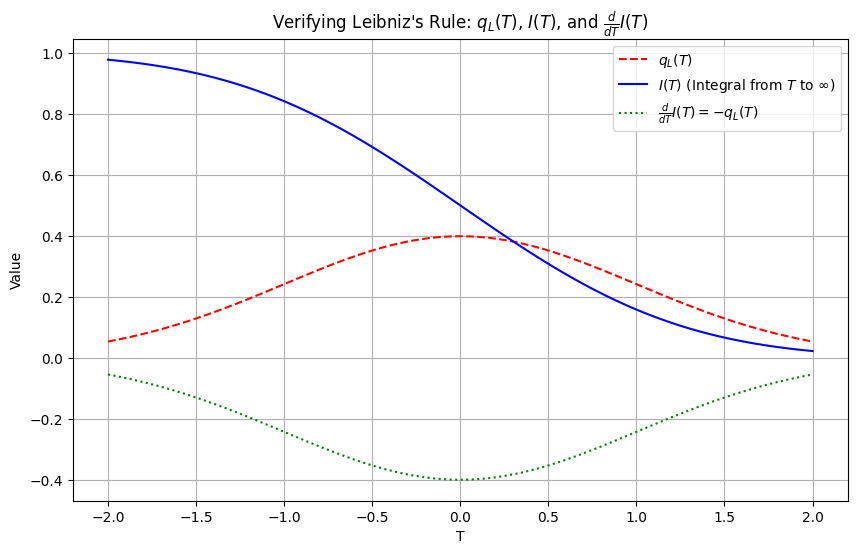

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

# Define Gaussian function q_L(x)
def q_L(x, mu_L=0, sigma_L=1):
    return (1 / (sigma_L * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu_L) / sigma_L) ** 2)

# Compute integral I(T) from T to infinity
def I_T(T, mu_L=0, sigma_L=1):
    return spi.quad(lambda x: q_L(x, mu_L, sigma_L), T, np.inf)[0]

# Numerical derivative using finite differences
def derivative(func, T, delta=1e-5):
    return (func(T + delta) - func(T)) / delta

# Generate T values
T_values = np.linspace(-2, 2, 100)

# Compute values for q_L(T), I(T), and dI/dT(T)
qL_vals = [q_L(T) for T in T_values]
I_vals = [I_T(T) for T in T_values]
dI_dT_vals = [-q_L(T) for T in T_values]  # Leibniz's rule states dI/dT = -q_L(T)

# Plotting results
plt.figure(figsize=(10, 6))

plt.plot(T_values, qL_vals, label=r"$q_L(T)$", linestyle="--", color="red")
plt.plot(T_values, I_vals, label=r"$I(T)$ (Integral from $T$ to $\infty$)", linestyle="-", color="blue")
plt.plot(T_values, dI_dT_vals, label=r"$\frac{d}{dT} I(T) = -q_L(T)$", linestyle=":", color="green")

plt.xlabel("T")
plt.ylabel("Value")
plt.title(r"Verifying Leibniz's Rule: $q_L(T)$, $I(T)$, and $\frac{d}{dT} I(T)$")
plt.legend()
plt.grid(True)

plt.show()


### the derivative: $$ \frac{dE_L(T)}{dT} $$

#### We are given the integral:
$$
E_L(T) = \int_{-\infty}^{T} q_H(t) \, dt
$$
where:
- The lower limit  ${-\infty}$ is constant.
- The upper limit \(T\)is variable.

Using the **Fundamental Theorem of Calculus**, the derivative of an integral with respect to its **upper limit** is given by:

$$
\frac{d}{dT} \left( \int_{a}^{T} f(t) \, dt \right) = f(T) \cdot \frac{d}{dT} (T)
$$
where \(a\) is constant.
Applying this to our integral:
$$
\frac{d}{dT} \left( \int_{-\infty}^{T} q_H(t) \, dt \right) = q_H(T) \cdot \frac{d}{dT} (T)
$$
Since:
$$
\frac{d}{dT} (T) = 1
$$
we obtain:
$$
\frac{dE_L(T)}{dT} = q_H(T)
$$
Thus, the final derivative is:
$$
\Large \frac{dE_L(T)}{dT} = q_H(T)
$$


### $$ P_H q_H(T) - P_L q_L(T) = 0 $$





#### $$ P_H q_H(T) = P_L q_L(T) $$
.
$$
\large P_H * \frac{1}{\sigma_{H} \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{T - \mu_{H}}{\sigma_{H}} \right)^2} = P_L * \frac{1}{\sigma_{L} \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{T - \mu_{L}}{\sigma_{L}} \right)^2}. 
$$
.
$$
\Large \frac{P_H}{\sigma_H} e^{\left( \frac{T - \mu_H}{\sigma_H} \right)^2} = \frac{P_L}{\sigma_L} e^{\left( \frac{T - \mu_L}{\sigma_L} \right)^2}
$$

We take the natural logarithm on both sides of (4.11), simplify, and reveal a quadratic equation in T:

$$
\large \ln \left( \frac{P_H}{\sigma_H} e^{-\frac{1}{2} \left( \frac{T - \mu_H}{\sigma_H} \right)^2} \right) = \ln \left( \frac{P_L}{\sigma_L} e^{-\frac{1}{2} \left( \frac{T - \mu_L}{\sigma_L} \right)^2} \right)
$$
.
$$
\ln \frac{P_H}{\sigma_H} + \ln\left(e^{-\frac{1}{2}\left(\frac{T-\mu_H}{\sigma_H}\right)^2}\right) = \ln \frac{P_L}{\sigma_L} + \ln\left(e^{-\frac{1}{2}\left(\frac{T-\mu_L}{\sigma_L}\right)^2}\right)
$$
.
$$
\ln \frac{P_H}{\sigma_H} + {-\frac{1}{2}\left(\frac{T-\mu_H}{\sigma_H}\right)^2} = \ln \frac{P_L}{\sigma_L} + {-\frac{1}{2}\left(\frac{T-\mu_L}{\sigma_L}\right)^2}
$$
.
$$
-\frac{1}{2} \left( \frac{T - \mu_H}{\sigma_H} \right)^2
+ \frac{1}{2} \left( \frac{T - \mu_L}{\sigma_L} \right)^2
=
\ln \frac{P_L}{\sigma_L} - \ln \frac{P_H}{\sigma_H}
$$

- Expand the squared terms in the left-hand side expression:
$$ 
\frac{1}{2} \left(\frac{T^2 - 2T\mu_H + \mu_H^2}{\sigma_H^2} \right) +\frac{1}{2} \left(\frac{T^2 - 2T\mu_L + \mu_L^2}{\sigma_L^2} \right) = \ln \frac{P_L}{\sigma_L} - \ln \frac{P_H}{\sigma_H}
$$
.
- Distribute the fractions:
$$ 
\frac{1}{2} \left( \frac{T^2}{\sigma_H^2} - \frac{2T\mu_H}{\sigma_H^2} + \frac{\mu_H^2}{\sigma_H^2} \right)+
\frac{1}{2} \left( \frac{T^2}{\sigma_L^2} - \frac{2T\mu_L}{\sigma_L^2} + \frac{\mu_L^2}{\sigma_L^2} \right) = \ln \frac{P_L \sigma_H}{P_H \sigma_L}
$$
.
- Rearrange by grouping like terms
$$ 
\left( \frac{T^2}{\sigma_L^2} - \frac{T^2}{\sigma_H^2} \right) + \left( -\frac{2T\mu_H}{\sigma_H^2} + \frac{2T\mu_L}{\sigma_L^2} \right) + \left( \frac{\mu_L^2}{\sigma_L^2} - \frac{\mu_H^2}{\sigma_H^2} \right) = 2 * \ln \frac{P_L \sigma_H}{P_H \sigma_L} 
$$
.
- multiply to the factor : 
.
$$
(\sigma_L^2 - \sigma_H^2) T^2 + 2\bigl(\sigma_H^2\,\mu_L - \sigma_L^2\,\mu_H\bigr) T + \left(\sigma_L^2\,\mu_H^2 - \sigma_H^2\,\mu_L^2 - 2\ln\frac{P_H\,\sigma_L}{P_L\,\sigma_H}\right) = 0.
$$


 The quadratic equation may have two, one, or zero solutions, depending upon the statistics of the true signal and its noise component. It may be necessary to compare the performance of two possible thresholds . And any solution T for must be in the range of the signal in question.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

def iterative_parametric_thresholding(image, tol=0.1, max_iter=50, pause_time=1.0, output_dir="iterative_thresholding_outputs"):
    """
    Iterative parametric thresholding algorithm with detailed step‐by‐step logging.
    
    For each iteration, besides generating and saving plots, the function writes 
    a detailed log of all computations (class counts, probabilities, means, sigmas, quadratic coefficients, etc.)
    to a text file in the output directory.
    
    The log file is created under: output_dir/iterative_thresholding_log.txt
    """
    # Create output directory if it doesn't exist.
    os.makedirs(output_dir, exist_ok=True)
    
    # Open a log file for writing the details.
    log_filepath = os.path.join(output_dir, "iterative_thresholding_log.txt")
    log_file = open(log_filepath, "w")
    
    log_file.write("Iterative Parametric Thresholding Log\n")
    log_file.write("======================================\n\n")
    
    # Convert image to float64 for numerical precision.
    image = image.astype(np.float64)
    total_pixels = image.size
    
    # Initial threshold guess: the overall mean intensity.
    T = np.mean(image)
    init_str = f"Starting iterative thresholding. Initial T = {T:.2f}\n"
    print(init_str)
    log_file.write(init_str + "\n")
    
    # Define intensity range for plotting Gaussian curves.
    x_range = np.linspace(0, 255, 1000)
    
    # Start the iterative process.
    for iteration in range(1, max_iter + 1):
        header = "\n--------------------------------------------------\n"
        header += f"Iteration {iteration}:\n"
        header += f"Current threshold T = {T:.2f}\n"
        print(header)
        log_file.write(header)
        
        # Segment the image based on the current threshold.
        meaningful_pixels = image[image >= T]
        noise_pixels = image[image < T]
        counts_str = f"Meaningful pixels count = {meaningful_pixels.size}, Noise pixels count = {noise_pixels.size}\n"
        print(counts_str)
        log_file.write(counts_str)
        
        # If one of the segments is empty, exit the loop.
        if meaningful_pixels.size == 0 or noise_pixels.size == 0:
            msg = "One of the segments is empty. Exiting iteration.\n"
            print(msg)
            log_file.write(msg)
            break
        
        # Compute a priori probabilities.
        PH = meaningful_pixels.size / total_pixels
        PL = noise_pixels.size / total_pixels
        prob_str = f"P_H = {PH:.4f}, P_L = {PL:.4f}\n"
        print(prob_str)
        log_file.write(prob_str)
        
        # Estimate Gaussian parameters for meaningful and noise groups.
        muH = meaningful_pixels.mean()
        sigmaH = meaningful_pixels.std() if meaningful_pixels.size > 1 else 1.0
        
        muL = noise_pixels.mean()
        sigmaL = noise_pixels.std() if noise_pixels.size > 1 else 1.0
        
        stats_str = f"mu_H = {muH:.2f}, sigma_H = {sigmaH:.2f}\n" \
                    f"mu_L = {muL:.2f}, sigma_L = {sigmaL:.2f}\n"
        print(stats_str)
        log_file.write(stats_str)
        
        # Calculate quadratic coefficients.
        A = (1 / sigmaL**2) - (1 / sigmaH**2)
        B = (-2 * muL / sigmaL**2) + (2 * muH / sigmaH**2)
        C = (muL**2 / sigmaL**2) - (muH**2 / sigmaH**2) - 2 * np.log((PL * sigmaH) / (PH * sigmaL))
        
        coeff_str = ("Quadratic coefficients:\n"
                     f"  A = 1/σ_L² - 1/σ_H² = {A:.4f}\n"
                     f"  B = -2*μ_L/σ_L² + 2*μ_H/σ_H² = {B:.4f}\n"
                     f"  C = μ_L²/σ_L² - μ_H²/σ_H² - 2*ln((P_L*σ_H)/(P_H*σ_L)) = {C:.4f}\n")
        print(coeff_str)
        log_file.write(coeff_str)
        
        # Solve for new threshold T using the quadratic formula.
        if np.abs(A) < 1e-8:
            newT = (muL + muH) / 2.0
            msg = f"A is nearly zero; using average threshold: newT = {newT:.2f}\n"
            print(msg)
            log_file.write(msg)
        else:
            discriminant = B**2 - 4 * A * C
            disc_str = f"Discriminant = B² - 4AC = {discriminant:.4f}\n"
            print(disc_str)
            log_file.write(disc_str)
            
            if discriminant < 0:
                newT = (muL + muH) / 2.0
                neg_disc = f"Negative discriminant encountered; using average of means: newT = {newT:.2f}\n"
                print(neg_disc)
                log_file.write(neg_disc)
            else:
                T1 = (-B + np.sqrt(discriminant)) / (2 * A)
                T2 = (-B - np.sqrt(discriminant)) / (2 * A)
                cand_str = f"Candidate thresholds: T1 = {T1:.4f}, T2 = {T2:.4f}\n"
                print(cand_str)
                log_file.write(cand_str)
                
                if muL <= T1 <= muH:
                    newT = T1
                    select_str = "Selected new threshold T1 (lies between μ_L and μ_H).\n"
                    print(select_str)
                    log_file.write(select_str)
                elif muL <= T2 <= muH:
                    newT = T2
                    select_str = "Selected new threshold T2 (lies between μ_L and μ_H).\n"
                    print(select_str)
                    log_file.write(select_str)
                else:
                    mid = (muL + muH) / 2.0
                    newT = T1 if np.abs(T1 - mid) < np.abs(T2 - mid) else T2
                    alt_str = (f"Neither candidate is in the expected range; selecting the threshold "
                               f"closest to the midpoint ({mid:.2f}), newT = {newT:.4f}\n")
                    print(alt_str)
                    log_file.write(alt_str)
        
        final_str = f"New threshold computed (newT) = {newT:.2f}\n"
        print(final_str)
        log_file.write(final_str)
        
        # ---------------------------
        # Plot 1: Gaussian PDFs and Parameter Details
        # ---------------------------
        fig1, ax1 = plt.subplots(figsize=(8, 6))
        ax1.hist(image.ravel(), bins=256, range=(0, 255), density=True, color='gray', alpha=0.4,
                 label="Intensity Histogram")
        
        noise_pdf = norm.pdf(x_range, muL, sigmaL)
        ax1.plot(x_range, noise_pdf, color='red', lw=2,
                 label=f"Noise: μ={muL:.1f}, σ={sigmaL:.1f}")
        meaningful_pdf = norm.pdf(x_range, muH, sigmaH)
        ax1.plot(x_range, meaningful_pdf, color='blue', lw=2,
                 label=f"Meaningful: μ={muH:.1f}, σ={sigmaH:.1f}")
        ax1.axvline(T, color='black', linestyle='--', lw=2,
                    label=f"Current T = {T:.1f}")
        ax1.set_title(f"Iteration {iteration}: Gaussian PDFs & Calculated Parameters")
        ax1.set_xlabel("Pixel Intensity")
        ax1.set_ylabel("Density")
        ax1.legend(loc='upper right')
        
        text_str = (
            f"Iteration: {iteration}\n"
            f"T = {T:.2f}\n"
            f"New T = {newT:.2f}\n"
            f"P_H = {PH:.4f}, P_L = {PL:.4f}\n"
            f"μ_H = {muH:.2f}, σ_H = {sigmaH:.2f}\n"
            f"μ_L = {muL:.2f}, σ_L = {sigmaL:.2f}\n"
            f"A = {A:.4f}\n"
            f"B = {B:.4f}\n"
            f"C = {C:.4f}\n"
            f"Discriminant = {discriminant:.4f}"
        )
        props = dict(boxstyle='round', facecolor='white', alpha=0.8)
        ax1.text(0.05, 0.95, text_str, transform=ax1.transAxes, fontsize=10,
                 verticalalignment='top', bbox=props)
        
        params_filename = os.path.join(output_dir, f"iteration_{iteration}_parameters.png")
        plt.savefig(params_filename, dpi=150)
        plt.close(fig1)
        
        # ---------------------------
        # Plot 2: Thresholded Image
        # ---------------------------
        _, thresholded_image = cv2.threshold(image, T, 255, cv2.THRESH_BINARY)
        
        fig2, ax2 = plt.subplots(figsize=(6, 6))
        ax2.imshow(thresholded_image, cmap='gray', vmin=0, vmax=255)
        ax2.set_title(f"Iteration {iteration}: Thresholded Image (T = {T:.1f})")
        ax2.axis('off')
        image_filename = os.path.join(output_dir, f"iteration_{iteration}_thresholded.png")
        plt.savefig(image_filename, dpi=150)
        plt.close(fig2)
        
        # Pause for visualization if desired.
        plt.pause(pause_time)
        
        # Check for convergence.
        if abs(newT - T) < tol:
            conv_str = f"Convergence reached at iteration {iteration}: T converged to {newT:.2f}\n"
            print(conv_str)
            log_file.write(conv_str)
            T = newT
            break
        
        T = newT  # Update T for the next iteration.
    
    log_file.write("\nFinal converged threshold: T = {:.2f}\n".format(T))
    print(f"\nFinal converged threshold: T = {T:.2f}")
    log_file.close()
    
    return T

# ---------------------------
# Example usage:
# ---------------------------
if __name__ == '__main__':
    # Update this path to your grayscale image.
    image_path = "sample3.jpg"
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or unable to load!")
    
    final_threshold = iterative_parametric_thresholding(image, tol=0.1, max_iter=50,
                                                        pause_time=1.5,
                                                        output_dir="iterative_thresholding_outputs")
    print(f"Final converged threshold: {final_threshold:.2f}")


Starting iterative thresholding. Initial T = 192.28


--------------------------------------------------
Iteration 1:
Current threshold T = 192.28

Meaningful pixels count = 953163, Noise pixels count = 512437

P_H = 0.6504, P_L = 0.3496

mu_H = 211.63, sigma_H = 11.82
mu_L = 156.30, sigma_L = 41.86

Quadratic coefficients:
  A = 1/σ_L² - 1/σ_H² = -0.0066
  B = -2*μ_L/σ_L² + 2*μ_H/σ_H² = 2.8523
  C = μ_L²/σ_L² - μ_H²/σ_H² - 2*ln((P_L*σ_H)/(P_H*σ_L)) = -302.9772

Discriminant = B² - 4AC = 0.1494

Candidate thresholds: T1 = 187.0902, T2 = 245.7503

Selected new threshold T1 (lies between μ_L and μ_H).

New threshold computed (newT) = 187.09


--------------------------------------------------
Iteration 2:
Current threshold T = 187.09

Meaningful pixels count = 1026246, Noise pixels count = 439354

P_H = 0.7002, P_L = 0.2998

mu_H = 210.11, sigma_H = 12.65
mu_L = 150.65, sigma_L = 42.65

Quadratic coefficients:
  A = 1/σ_L² - 1/σ_H² = -0.0057
  B = -2*μ_L/σ_L² + 2*μ_H/σ_H² = 2.4613
  C = 